In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy().dropna(subset='salary_year_avg')
df_explode = df_DA_US.explode('job_skills')
df_explode[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [4]:
df_skills = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_skills = df_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [5]:
# Now we need percentages. So lets use our originally made df_DA_US
df_job_count = len(df_DA_US)
df_skills['skill_percent'] = df_skills['skill_count'] / df_job_count *100

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [6]:
skill_percent = 5

df_skills_high_demand = df_skills[df_skills['skill_percent'] > skill_percent]

In [ ]:
# Now to color categorize the skills by what kind of skills they are...

df_tech = df['job_type_skills'].copy()

df_tech = df_tech.drop_duplicates()

df_tech = df_tech.dropna()

tech_dict = {}

for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value

for key, value in tech_dict.items():
    tech_dict[key]=list(set(value))

{'analyst_tools': ['spss',
  'datarobot',
  'qlik',
  'powerbi',
  'outlook',
  'sharepoint',
  'ms access',
  'ssis',
  'power bi',
  'spreadsheet',
  'tableau',
  'dax',
  'sap',
  'alteryx',
  'powerpoint',
  'nuix',
  'cognos',
  'msaccess',
  'esquisse',
  'splunk',
  'word',
  'microstrategy',
  'sheets',
  'visio',
  'ssrs',
  'excel',
  'looker',
  'sas'],
 'programming': ['typescript',
  't-sql',
  'powershell',
  'elixir',
  'html',
  'visualbasic',
  'lua',
  'julia',
  'javascript',
  'clojure',
  'go',
  'haskell',
  'ruby',
  'matlab',
  'c++',
  'c',
  'css',
  'python',
  'f#',
  'dart',
  'erlang',
  'shell',
  'sass',
  'swift',
  'php',
  'apl',
  'visual basic',
  'pascal',
  'bash',
  'mongo',
  'golang',
  'sql',
  'kotlin',
  'c#',
  'scala',
  'mongodb',
  'nosql',
  'fortran',
  'vba',
  'solidity',
  'crystal',
  'objective-c',
  'vb.net',
  'delphi',
  'ocaml',
  'perl',
  'lisp',
  'assembly',
  'groovy',
  'rust',
  'r',
  'cobol',
  'sas',
  'no-sql',
  'j

In [ ]:
df_technology = pd.DataFrame(list(tech_dict.items()), columns =['technology', 'skills'])
df_technology = df_technology.explode('skills')

In [21]:
df_plot = df_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

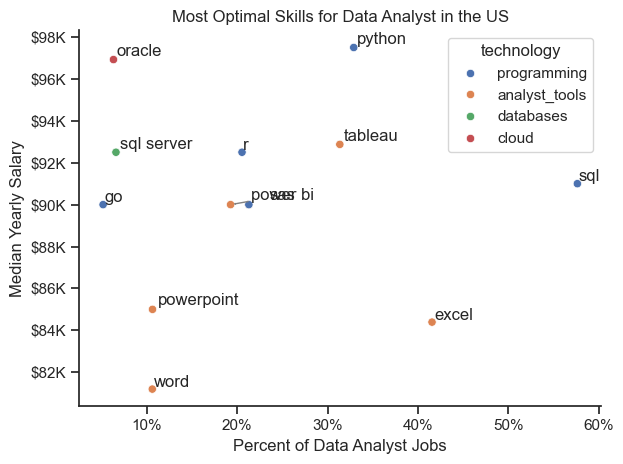

In [24]:
# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(data=df_plot,
                x='skill_percent',
                y='median_salary',
                hue='technology' )

texts = []
for i, txt in enumerate(df_skills_high_demand.index):
    texts.append(plt.text(df_skills_high_demand['skill_percent'].iloc[i], df_skills_high_demand['median_salary'].iloc[i], txt)) 

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

sns.despine()
sns.set_theme(style='ticks')
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pl: f'${int(y/1000)}K'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')
plt.tight_layout()
plt.show()